<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

<img src="small_images.jpg" />

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

<h4 style="color:purple">Load the dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

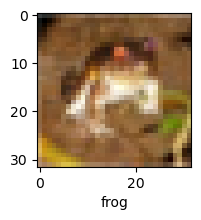

In [10]:
plot_sample(X_train, y_train, 0)

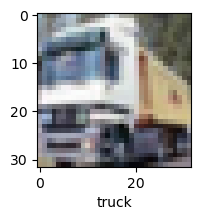

In [11]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 75s 48ms/step - loss: 1.8165 - accuracy: 0.3543
Epoch 2/5
1563/1563 [==============================] - 78s 50ms/step - loss: 1.6256 - accuracy: 0.4256
Epoch 3/5
1563/1563 [==============================] - 76s 49ms/step - loss: 1.5440 - accuracy: 0.4550
Epoch 4/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.4834 - accuracy: 0.4771
Epoch 5/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4324 - accuracy: 0.4970


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 16ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.53      0.56      1000
           1       0.61      0.61      0.61      1000
           2       0.38      0.41      0.39      1000
           3       0.39      0.30      0.34      1000
           4       0.46      0.37      0.41      1000
           5       0.56      0.19      0.28      1000
           6       0.48      0.61      0.54      1000
           7       0.45      0.67      0.54      1000
           8       0.52      0.71      0.60      1000
           9       0.57      0.56      0.56      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.48     10000
weighted avg       0.50      0.50      0.48     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4754 - accuracy: 0.4717
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1383 - accuracy: 0.6008
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0142 - accuracy: 0.6453
Epoch 4/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.9274 - accuracy: 0.6779
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8655 - accuracy: 0.6982
Epoch 6/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8115 - accuracy: 0.7169
Epoch 7/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.7659 - accuracy: 0.7327
Epoch 8/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7246 - accuracy: 0.7465
Epoch 9/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.6884 - accuracy: 0.7590
Epoch 10/10
1563/1563 [==============================] - 36s 23m

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9523 - accuracy: 0.6867


[0.9523031115531921, 0.6866999864578247]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[1.7928373e-03, 2.6841709e-04, 7.0433714e-03, 5.6778294e-01,
        4.0582027e-03, 3.4304234e-01, 7.5388037e-02, 7.8047298e-05,
        5.4049538e-04, 5.4073098e-06],
       [2.2311569e-03, 2.3263417e-01, 2.0909688e-06, 1.6869351e-06,
        8.7857654e-05, 6.7966206e-09, 4.3528644e-06, 1.6268561e-07,
        7.6228976e-01, 2.7489106e-03],
       [1.7778900e-01, 6.1846834e-01, 9.5437728e-03, 3.6121737e-03,
        4.7413236e-03, 2.4487982e-03, 1.1241103e-03, 7.3949001e-03,
        1.5881464e-01, 1.6062940e-02],
       [4.6851629e-01, 3.7051316e-03, 1.6086686e-02, 1.6051064e-03,
        1.5703630e-02, 2.2570011e-05, 8.6769573e-03, 9.6095369e-05,
        4.8462668e-01, 9.6087356e-04],
       [4.2861188e-07, 7.5526797e-05, 2.4976669e-02, 4.7381267e-02,
        4.4422811e-01, 1.0014169e-02, 4.7330585e-01, 6.3583898e-06,
        1.1250331e-05, 3.8652271e-07]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 8, 6]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

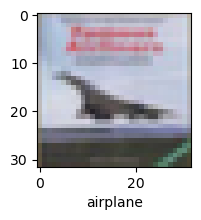

In [31]:
plot_sample(X_test, y_test,3)

In [26]:
classes[y_classes[3]]

'ship'

In [27]:
classes[y_classes[3]]

'ship'